In [1]:
import os

import trimesh

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)  # I want to see all columns

# Analysis comparison on how the mesh simplification algorithm performed

I guess I will start with some descriptive analysis of the resulting geometric features of the simplified meshes and the original. One of the most interesting metrics while I explored the original dataset geometric data was the Euler charateristic. That is why I will mainly be working on this feature (I hope I have time to work on other!).

In [ ]:
original_folder_path = './../../data/Thingi10K/raw_meshes/FilteredFiles/'
simplified_folder_path = './../../data/simplified_output/'
run_folder_names = ['output_t0.1_r0.5_p2000', 'output_t0.1_r0.9_p2000', 'output_t0.3_r0.9_p2000', 'output_t0.0_r0.5_p2000']
geom_features_path = './../../data/csv_data/feature_extracted_simplified_meshes/'

In [4]:
datasets={}
for run in run_folder_names:
    datasets[run] = pd.read_csv(geom_features_path + run + '_geom.csv')

Load the original datasets

In [ ]:
geom_data_original = pd.read_csv("./../../data/csv_data/cleaned_Thingi_data/geometric_data_Thingi700.csv", index_col=0)

In [6]:
datasets['output_t0.1_r0.5_p2000'].head()

,file_id,num_vertices,num_faces,num_geometrical_degenerated_faces,num_combinatorial_degenerated_faces,num_connected_components,num_boundary_edges,num_duplicated_faces,euler_characteristic,num_self_intersections,num_coplanar_intersecting_faces,vertex_manifold,edge_manifold,oriented,total_area,min_area,p25_area,median_area,p75_area,p90_area,p95_area,max_area,min_valance,p25_valance,median_valance,p75_valance,p90_valance,p95_valance,max_valance,min_dihedral_angle,p25_dihedral_angle,median_dihedral_angle,p75_dihedral_angle,p90_dihedral_angle,p95_dihedral_angle,max_dihedral_angle,min_aspect_ratio,p25_aspect_ratio,median_aspect_ratio,p75_aspect_ratio,p90_aspect_ratio,p95_aspect_ratio,max_aspect_ratio,solid,ave_area,ave_valance,ave_dihedral_angle,ave_aspect_ratio
0,100026,58,138,0,3,5,0,1,-5,31,32,False,False,False,20405.406898,13.200107,54.774979,83.741676,129.570382,318.711020,587.242380,1575.563542,2,5.0,7.0,8.75,10.0,11.0,13,0.0,5.333876e-02,0.716179,1.571471,1.921774,2.815630,3.141593,1.203473,2.767684,5.656515,8.104187,12.318132,16.676760,69.025422,False,147.865267,6.931034,0.935189,6.905350
1,100029,101,228,0,0,4,0,0,-15,45,106,False,False,False,22539.727594,2.786319,38.991939,78.087984,119.121321,195.347816,263.330221,557.226563,4,6.0,7.0,8.00,9.0,10.0,12,0.0,4.757239e-04,0.604984,1.570796,1.801298,2.399591,3.139179,1.078841,5.229754,9.377492,16.196274,23.857591,50.489039,350.391049,False,98.858454,6.811881,0.864840,17.232725
2,100031,155,330,0,0,1,0,0,-10,37,190,True,False,False,4910.141010,0.004849,2.050855,4.588414,20.028555,42.238298,68.330959,155.149905,4,5.0,6.0,7.00,9.0,11.0,16,0.0,2.446780e-05,0.183254,1.570802,1.591089,1.595740,3.141593,1.041348,1.896109,2.696655,23.080845,39.470020,59.700323,183058.078547,True,14.879215,6.387097,0.689493,578.595348
3,100032,758,1611,0,0,5,0,0,-49,0,961,False,False,False,23992.186217,0.013603,1.666100,4.251036,14.159609,39.412796,79.081248,264.611298,3,5.0,6.0,7.00,9.0,10.0,19,0.0,7.584332e-06,0.183113,1.570796,1.586692,1.591690,3.141593,1.032196,2.282931,3.695345,20.673596,43.771057,72.199736,6076.923997,False,14.892729,6.379947,0.659564,26.801130
4,100075,363,740,0,0,6,0,0,-6,45,415,False,False,False,82.761239,0.000897,0.014945,0.022058,0.081335,0.217002,0.435265,3.885226,3,5.0,6.0,7.00,8.0,9.9,19,0.0,1.490116e-08,0.180667,1.570796,1.585925,1.603892,3.141593,1.037407,1.413669,1.787943,4.653654,9.292754,13.112814,207.054351,False,0.111840,6.110193,0.697601,5.056098


In [7]:
datasets['output_t0.1_r0.5_p2000']

,file_id,num_vertices,num_faces,num_geometrical_degenerated_faces,num_combinatorial_degenerated_faces,num_connected_components,num_boundary_edges,num_duplicated_faces,euler_characteristic,num_self_intersections,num_coplanar_intersecting_faces,vertex_manifold,edge_manifold,oriented,total_area,min_area,p25_area,median_area,p75_area,p90_area,p95_area,max_area,min_valance,p25_valance,median_valance,p75_valance,p90_valance,p95_valance,max_valance,min_dihedral_angle,p25_dihedral_angle,median_dihedral_angle,p75_dihedral_angle,p90_dihedral_angle,p95_dihedral_angle,max_dihedral_angle,min_aspect_ratio,p25_aspect_ratio,median_aspect_ratio,p75_aspect_ratio,p90_aspect_ratio,p95_aspect_ratio,max_aspect_ratio,solid,ave_area,ave_valance,ave_dihedral_angle,ave_aspect_ratio
0,100026,58,138,0,3,5,0,1,-5,31,32,False,False,False,20405.406898,13.200107,54.774979,83.741676,129.570382,318.711020,587.242380,1575.563542,2,5.0,7.0,8.75,10.0,11.00,13,0.000000,5.333876e-02,0.716179,1.571471,1.921774,2.815630,3.141593,1.203473,2.767684,5.656515,8.104187,12.318132,16.676760,69.025422,False,147.865267,6.931034,0.935189,6.905350
1,100029,101,228,0,0,4,0,0,-15,45,106,False,False,False,22539.727594,2.786319,38.991939,78.087984,119.121321,195.347816,263.330221,557.226563,4,6.0,7.0,8.00,9.0,10.00,12,0.000000,4.757239e-04,0.604984,1.570796,1.801298,2.399591,3.139179,1.078841,5.229754,9.377492,16.196274,23.857591,50.489039,350.391049,False,98.858454,6.811881,0.864840,17.232725
2,100031,155,330,0,0,1,0,0,-10,37,190,True,False,False,4910.141010,0.004849,2.050855,4.588414,20.028555,42.238298,68.330959,155.149905,4,5.0,6.0,7.00,9.0,11.00,16,0.000000,2.446780e-05,0.183254,1.570802,1.591089,1.595740,3.141593,1.041348,1.896109,2.696655,23.080845,39.470020,59.700323,183058.078547,True,14.879215,6.387097,0.689493,578.595348
3,100032,758,1611,0,0,5,0,0,-49,0,961,False,False,False,23992.186217,0.013603,1.666100,4.251036,14.159609,39.412796,79.081248,264.611298,3,5.0,6.0,7.00,9.0,10.00,19,0.000000,7.584332e-06,0.183113,1.570796,1.586692,1.591690,3.141593,1.032196,2.282931,3.695345,20.673596,43.771057,72.199736,6076.923997,False,14.892729,6.379947,0.659564,26.801130
4,100075,363,740,0,0,6,0,0,-6,45,415,False,False,False,82.761239,0.000897,0.014945,0.022058,0.081335,0.217002,0.435265,3.885226,3,5.0,6.0,7.00,8.0,9.90,19,0.000000,1.490116e-08,0.180667,1.570796,1.585925,1.603892,3.141593,1.037407,1.413669,1.787943,4.653654,9.292754,13.112814,207.054351,False,0.111840,6.110193,0.697601,5.056098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,200683,24,44,0,0,1,0,0,2,4,38,True,False,False,2263.773277,0.271393,11.380169,18.121272,57.988002,141.284915,231.313338,289.940019,4,4.0,5.0,6.00,7.0,7.85,9,0.000000,0.000000e+00,0.001158,1.570796,1.570838,1.571158,2.356194,1.066622,1.745136,6.901611,14.312149,28.423990,36.975136,67.045062,True,51.449393,5.500000,0.619028,11.730781
696,200685,26,46,0,0,1,0,0,0,12,32,False,False,True,5415.960721,2.502500,8.622625,40.470006,123.745502,261.240505,577.479038,742.418047,3,5.0,6.0,6.00,6.5,7.00,7,0.000000,0.000000e+00,1.570796,1.570796,1.570796,1.570796,1.570796,1.423308,2.041767,3.872473,7.381297,13.009897,16.094413,25.468990,False,117.738277,5.538462,0.809198,5.920322
697,200687,73,146,0,0,1,0,0,0,6,73,True,False,False,2183.337965,3.722780,5.290535,7.628090,13.588615,35.545891,55.915005,86.728654,4,5.0,6.0,6.00,7.0,9.60,12,0.000000,5.323448e-05,0.155762,1.548862,1.578327,1.608849,1.616863,1.011885,1.300867,1.409267,2.396180,4.067611,4.307027,5.113341,True,14.954370,6.000000,0.598118,2.030258
698,200691,123,242,0,0,1,0,0,2,6,93,True,False,False,474.128816,0.089303,0.703639,1.171928,3.136229,4.442375,4.913637,5.905139,4,5.0,6.0,6.00,7.0,7.90,14,0.000000,2.743280e-03,0.154041,0.782424,1.569283,1.573552,1.580507,1.106764,1.523269,2.729577,4.003287,5.481308,5.795537,9.728763,True,1.959210,5.902439,0.48993

In [8]:
datasets['output_t0.1_r0.5_p2000'].describe().T

,count,mean,std,min,25%,50%,75%,max
file_id,700.0,6.124237e+05,6.073441e+05,100026.000000,117616.500000,153235.000000,1.224386e+06,1.772543e+06
num_vertices,700.0,2.175094e+03,3.609161e+03,4.000000,195.750000,684.500000,2.407500e+03,2.022600e+04
num_faces,700.0,4.397464e+03,7.252498e+03,4.000000,399.000000,1436.000000,4.814500e+03,4.061800e+04
num_geometrical_degenerated_faces,700.0,5.800000e-01,4.090975e+00,0.000000,0.000000,0.000000,0.000000e+00,5.900000e+01
num_combinatorial_degenerated_faces,700.0,1.282286e+01,8.509154e+01,0.000000,0.000000,0.000000,1.000000e+00,1.332000e+03
num_connected_components,700.0,3.662714e+01,2.559669e+02,1.000000,1.000000,1.000000,5.000000e+00,3.996000e+03
num_boundary_edges,700.0,1.857143e-02,2.229936e-01,0.000000,0.000000,0.000000,0.000000e+00,4.000000e+00
num_duplicated_faces,700.0,8.021429e+00,8.237587e+01,0.000000,0.000000,0.000000,0.000000e+00,1.332000e+03
euler_characteristic,700.0,1.355714e+01,2.208420e+02,-2876.000000,-3.000000,1.500000,2.000000e+00,2.640000e+03
num_self_intersections,700.0,8.054571e+01,1.392221e+02,0.000000,0.000000,24.500000,1.092500e+02,1.398000e+03


### Euler characteristic analysis

Let's see if the Euler characteristic has changed much compared to the number of faces (we know taht vertices and faces have correlation 1 from the 01 notebook, so we can use whiever we want) w.r.t. thresholds and simplification ratios we chose. the algorithm can close holes for given threshold values.

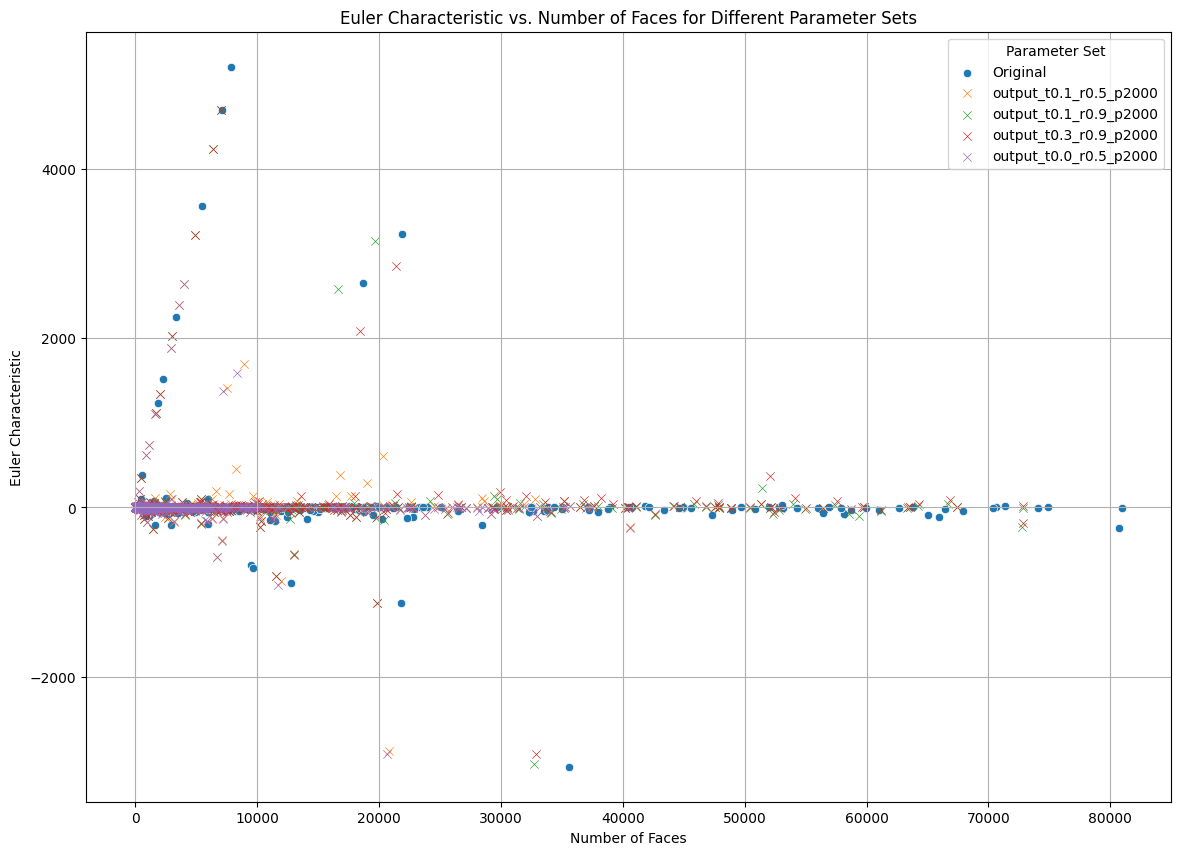

In [9]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x=geom_data_original.num_faces, y=geom_data_original.euler_characteristic, marker='o', label="Original")
for label, dataset in datasets.items():
    sns.scatterplot(x=dataset['num_faces'], y=dataset['euler_characteristic'], marker='x', label=label)

plt.title('Euler Characteristic vs. Number of Faces for Different Parameter Sets')
plt.xlabel('Number of Faces')
plt.ylabel('Euler Characteristic')
plt.legend(title='Parameter Set')
plt.grid(True)
plt.show()

From the scatter plot we see that twe cannot conclude that new holes don't open up and new components don't open up. In some meshes we see that the charateristic stays the same or is less (absolute value) and in other places where the charateristic was relatively low, now we see that the absolute value has grown. Let's dive in to see more about how this number has changed w.r.t. the chosen parameter for the run.

Let us calculate the difference in the Euler characteristic and hilight regions.

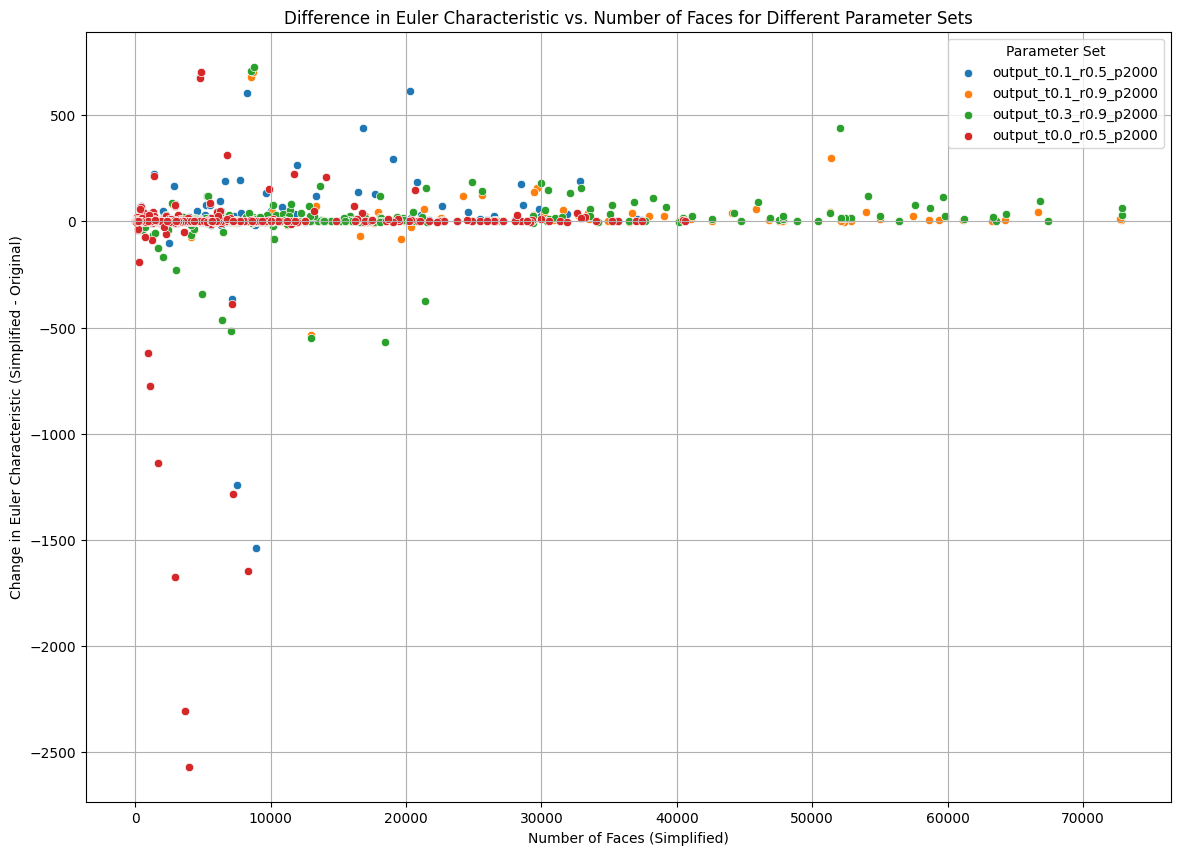

In [10]:
# Calculate the difference in Euler characteristic for each dataset
euler_diff = {}
for label, data in datasets.items():
    merged_data = pd.merge(geom_data_original[['file_id', 'euler_characteristic', 'num_faces']],
                           data[['file_id', 'euler_characteristic', 'num_faces']],
                           on='file_id',
                           suffixes=('_original', '_simplified'))
    merged_data['euler_diff'] = merged_data['euler_characteristic_simplified'] - merged_data['euler_characteristic_original']
    euler_diff[label] = merged_data

plt.figure(figsize=(14, 10))

for label, diff_data in euler_diff.items():
    sns.scatterplot(x=diff_data['num_faces_simplified'], y=diff_data['euler_diff'], label=label)

plt.title('Difference in Euler Characteristic vs. Number of Faces for Different Parameter Sets')
plt.xlabel('Number of Faces (Simplified)')
plt.ylabel('Change in Euler Characteristic (Simplified - Original)')
plt.legend(title='Parameter Set')
plt.grid(True)
plt.show()

The horizontal line at $y=0$ represents cases where the Euler characteristic did not change after simplification. Points above this line indicate an increase in the Euler characteristic, while points below indicate a decrease. The increases in the Euler characteristic could indicate the filling of holes or merging of disconnected components during simplification and the decreases suggest the introduction of new holes or the splitting of connected components, possibly leading to more disconnected regions.

Threshold=0.0, Ratio=0.5: This parameter set shows a relatively small change in Euler characteristic across most meshes, suggesting that this combination tends to preserve the topology closely to the original which figures since we don't have a threshold to use. But the 0.5 simplification ratio has taken its toll on simpler meshes by altering too much their topology.

Threshold=0.1, Ratio=0.5 and Threshold=0.1, Ratio=0.9: These show more variability in Euler characteristic changes, with some meshes experiencing significant increases or decreases, indicating more aggressive simplification. Again, for simplification ratio of 0.5 we see more aggresive alternation of the topology than for the lower ratio of 0.9 (0.9 means that we have 10% simplification).

Threshold=0.3, Ratio=0.9: This set exhibits the most significant changes, with several instances of large positive or negative differences, indicating that this combination might introduce more holes or disconnected components or dramatically alter the mesh's topology for all sizes of meshes.

Let's continue to filter out some of these outliers (having a diffrence greater than 500 in absolute value) and see them.

In [11]:
threshold = 500

In [12]:
filtered_euler_diff = {}
for label, diff_data in euler_diff.items():
    filtered_data = diff_data[(diff_data['euler_diff'] > threshold) | (diff_data['euler_diff'] < -threshold)]
    filtered_euler_diff[label] = filtered_data

In [13]:
filtered_euler_diff

{'output_t0.1_r0.5_p2000':      file_id  euler_characteristic_original  num_faces_original  \
 88   1051177                              0               38948   
 95    105799                           -685                9472   
 105   106327                           -712                9692   
 478   138092                           4698                7092   
 479   138095                           1236                1854   
 480   138189                           1514                2268   
 481   138193                           5208                7848   
 483   138199                           2250                3360   
 484   138208                           3563                5448   
 551  1508788                           2654               18656   
 552  1508790                           3234               21852   
 685   196125                           -152               11096   
 
      euler_characteristic_simplified  num_faces_simplified  euler_diff  
 88           

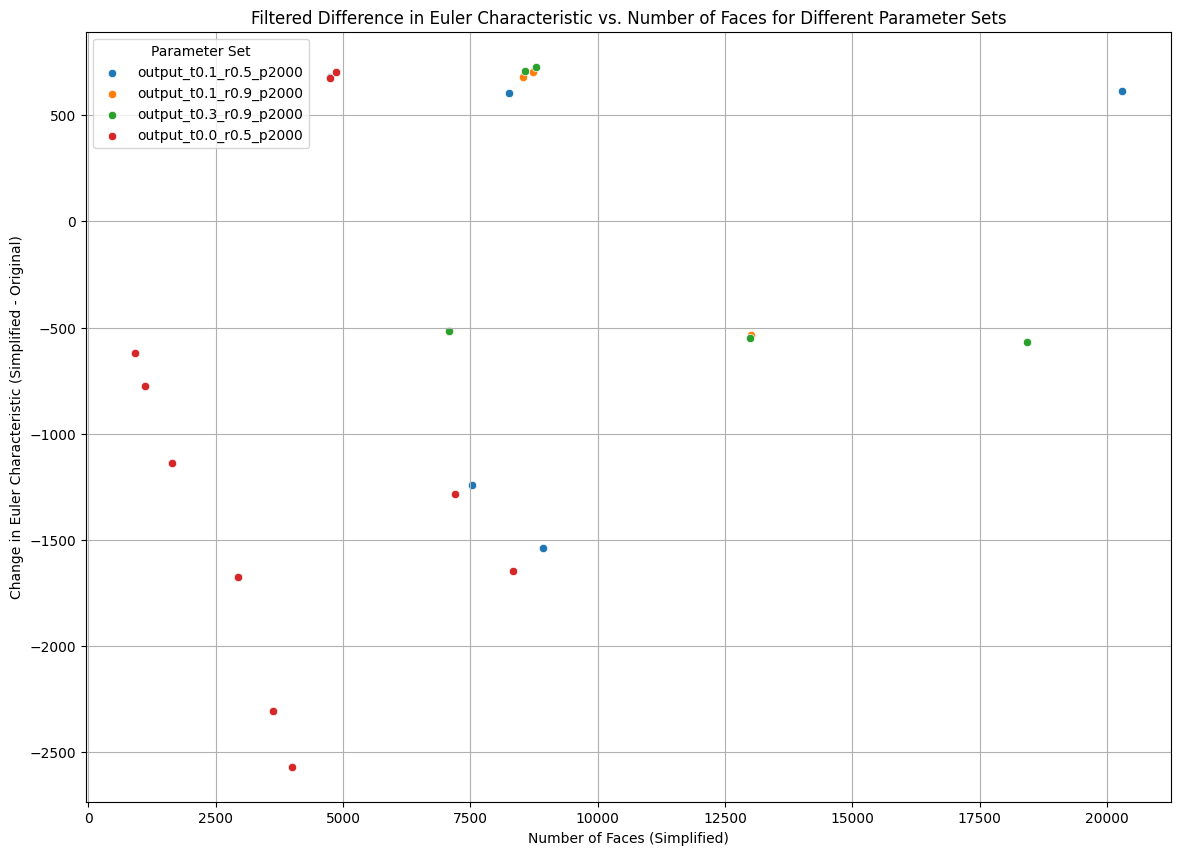

In [14]:
plt.figure(figsize=(14, 10))

for label, diff_data in filtered_euler_diff.items():
    sns.scatterplot(x=diff_data['num_faces_simplified'], y=diff_data['euler_diff'], label=label)

plt.title('Filtered Difference in Euler Characteristic vs. Number of Faces for Different Parameter Sets')
plt.xlabel('Number of Faces (Simplified)')
plt.ylabel('Change in Euler Characteristic (Simplified - Original)')
plt.legend(title='Parameter Set')
plt.grid(True)
plt.show()

I want to know which files are those outliers.

In [15]:
filtered_file_ids = {label: diff_data['file_id'].tolist() for label, diff_data in filtered_euler_diff.items()}

In [16]:
filtered_file_ids

{'output_t0.1_r0.5_p2000': [1051177,
  105799,
  106327,
  138092,
  138095,
  138189,
  138193,
  138199,
  138208,
  1508788,
  1508790,
  196125],
 'output_t0.1_r0.9_p2000': [105799, 106327, 138193, 148452],
 'output_t0.3_r0.9_p2000': [105799, 106327, 138193, 148452, 1508788],
 'output_t0.0_r0.5_p2000': [105799,
  106327,
  138092,
  138095,
  138189,
  138193,
  138199,
  138208,
  1508788,
  1508790]}

I think these meshes will be intersting to be viewed and to see their visual fidelity scores.

### Visualization of the Euler charateristic outliers and visual fidelity scores comparisons

I know that all meshes I have chosen now are `.stl`, so I will use this assumption.

In [17]:
def display_mesh_previews(file_ids, original_folder_path, simplified_folder_path, img_size=(500, 500)):
    """
    Displays 3D mesh previews for specified STL files directly in the notebook.

    Parameters:
    file_ids (list): List of file IDs to display previews for.
    original_folder_path (str): Path to the folder containing 3D mesh files.
    img_size (tuple): Size of the display area in pixels (width, height). Default is (500, 500).

    Returns:
    None
    """

    for file_id in file_ids:
        filename = f'{file_id}.stl'
        file_path_1 = os.path.join(original_folder_path, filename)
        file_path_2 = os.path.join(simplified_folder_path, filename)

        mesh1 = trimesh.load(file_path_1)
        mesh2 = trimesh.load(file_path_2)
        
        fig, axs = plt.subplots(1, 2, figsize=(img_size[0]/100*2, img_size[1]/100), subplot_kw={'projection': '3d'})
        axs = axs.flatten()

        # Plot the first mesh
        axs[0].plot_trisurf(mesh1.vertices[:, 0], mesh1.vertices[:, 1], mesh1.faces, mesh1.vertices[:, 2], color='white', edgecolor='k')
        axs[0].axis('off')
        axs[0].set_title(f'Mesh ID: {file_id} (Original mesh)\n Euler char: {mesh1.euler_number}')

        # Plot the second mesh
        axs[1].plot_trisurf(mesh2.vertices[:, 0], mesh2.vertices[:, 1], mesh2.faces, mesh2.vertices[:, 2], color='white', edgecolor='k')
        axs[1].axis('off')
        axs[1].set_title(f'Mesh ID: {file_id} (Simplified mesh)\n Euler char: {mesh2.euler_number}')

        plt.show()

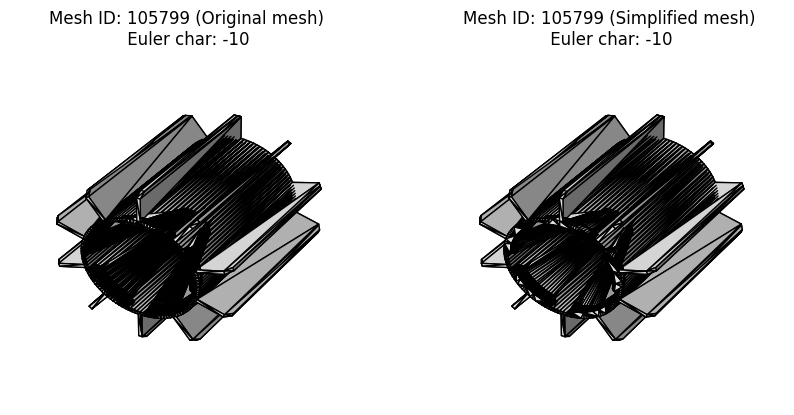

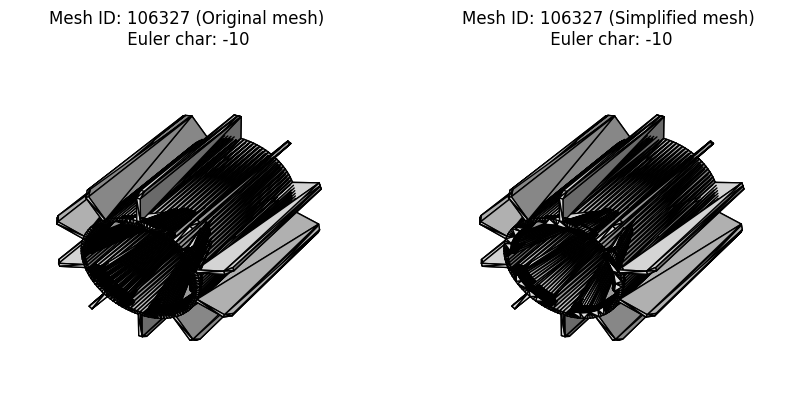

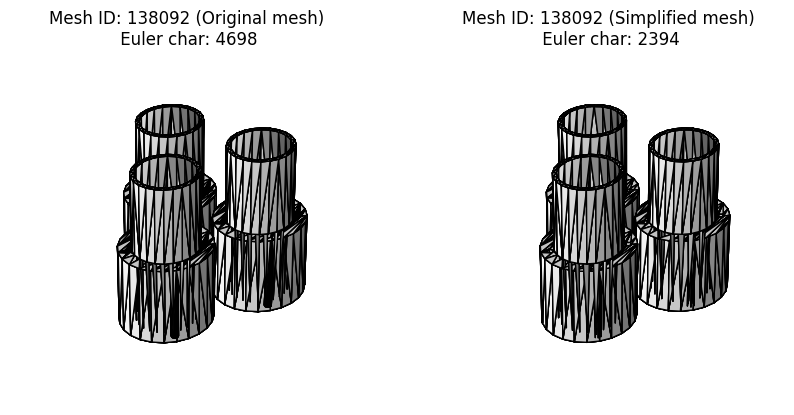

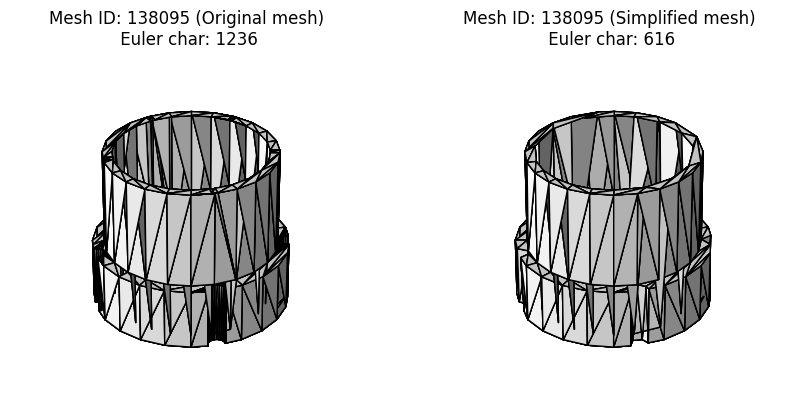

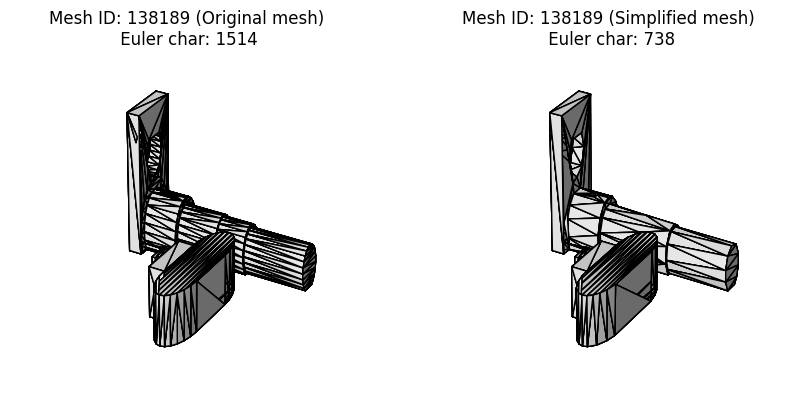

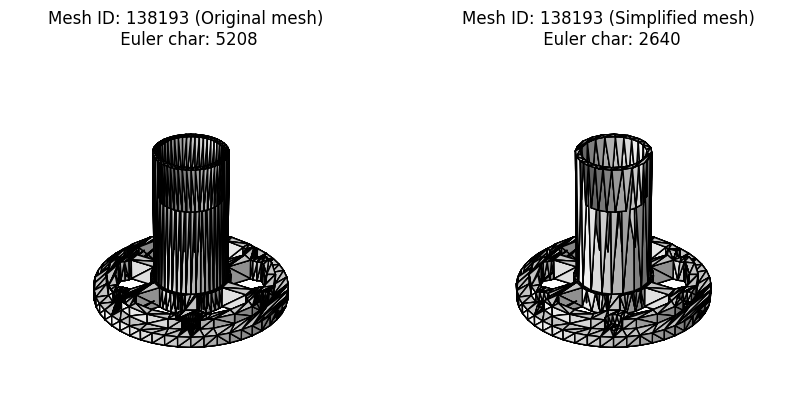

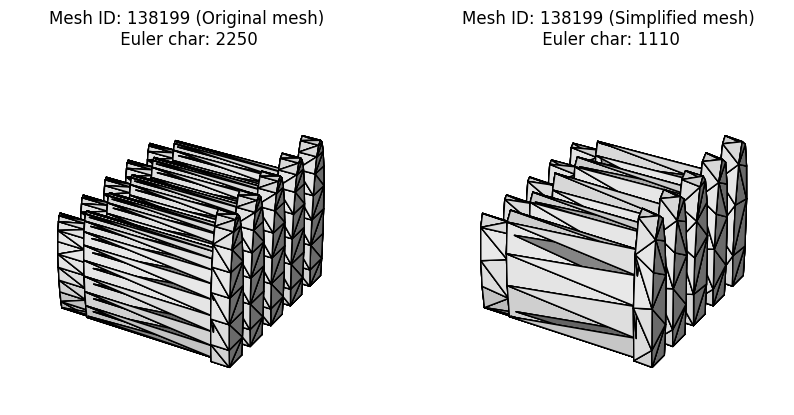

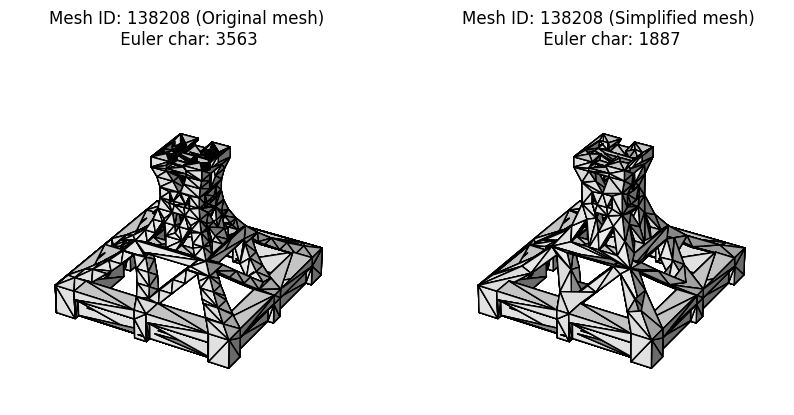

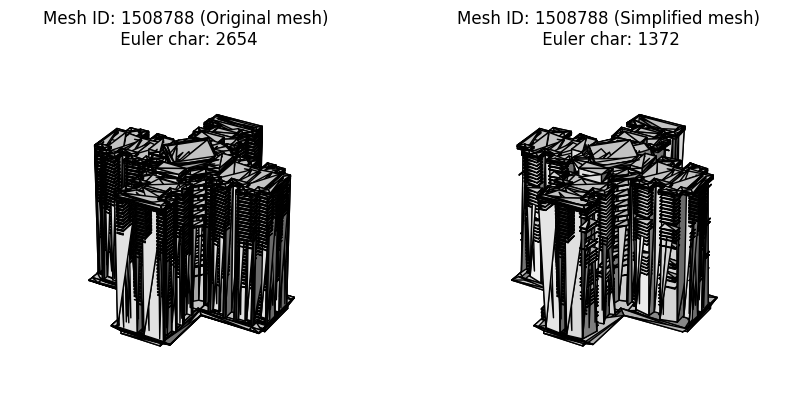

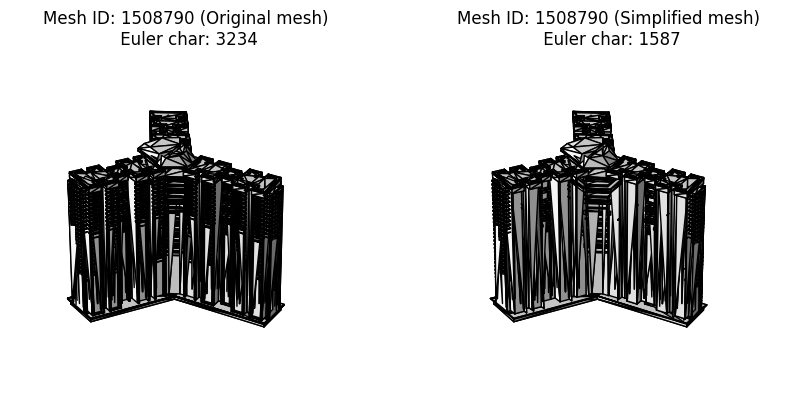

In [18]:
display_mesh_previews(filtered_file_ids['output_t0.0_r0.5_p2000'], original_folder_path, simplified_folder_path + 'output_t0.0_r0.5_p2000')

In [19]:
geom_data_original[geom_data_original.file_id == 105799]

,file_id,num_vertices,num_faces,num_geometrical_degenerated_faces,num_combinatorial_degenerated_faces,num_connected_components,num_boundary_edges,num_duplicated_faces,euler_characteristic,num_self_intersections,num_coplanar_intersecting_faces,vertex_manifold,edge_manifold,oriented,total_area,min_area,p25_area,median_area,p75_area,p90_area,p95_area,max_area,min_valance,p25_valance,median_valance,p75_valance,p90_valance,p95_valance,max_valance,min_dihedral_angle,p25_dihedral_angle,median_dihedral_angle,p75_dihedral_angle,p90_dihedral_angle,p95_dihedral_angle,max_dihedral_angle,min_aspect_ratio,p25_aspect_ratio,median_aspect_ratio,p75_aspect_ratio,p90_aspect_ratio,p95_aspect_ratio,max_aspect_ratio,solid,ave_area,ave_valance,ave_dihedral_angle,ave_aspect_ratio
95,105799,6972,9472,0,0,51,5842,0,-685,1928,0,0,1,1,35370.44928,0.000031,0.100803,0.119126,0.629316,6.638269,22.445459,294.034156,2.0,3.0,4.0,6.0,7.0,9.0,20.0,0.0,0.0,1.100000e-11,0.055594,0.12735,0.139459,2.64107,1.004653,1.881336,2.231973,18.340123,64.440624,183.692319,89581.43144,0,3.734211,4.913655,0.06153,124.596561


In [20]:
datasets['output_t0.0_r0.5_p2000'][geom_data_original.file_id == 105799]

,file_id,num_vertices,num_faces,num_geometrical_degenerated_faces,num_combinatorial_degenerated_faces,num_connected_components,num_boundary_edges,num_duplicated_faces,euler_characteristic,num_self_intersections,num_coplanar_intersecting_faces,vertex_manifold,edge_manifold,oriented,total_area,min_area,p25_area,median_area,p75_area,p90_area,p95_area,max_area,min_valance,p25_valance,median_valance,p75_valance,p90_valance,p95_valance,max_valance,min_dihedral_angle,p25_dihedral_angle,median_dihedral_angle,p75_dihedral_angle,p90_dihedral_angle,p95_dihedral_angle,max_dihedral_angle,min_aspect_ratio,p25_aspect_ratio,median_aspect_ratio,p75_aspect_ratio,p90_aspect_ratio,p95_aspect_ratio,max_aspect_ratio,solid,ave_area,ave_valance,ave_dihedral_angle,ave_aspect_ratio
95,105799,2363,4746,0,0,1,0,0,-10,101,1753,True,False,False,35372.010489,0.012269,0.168654,0.541958,1.936131,31.795424,35.121913,294.034176,4,5.0,6.0,6.0,7.0,8.0,23,0.0,0.004909,0.05818,0.167839,1.570796,1.570946,2.610103,1.047191,1.918541,3.855877,8.136215,20.371439,20.849038,1329.390869,True,7.453015,6.025391,0.326659,7.700248


Ha, it seems that `trimesh` and the original dataset value of the Euler characteristic doesn't match. In this case I will calculate the Euler characteristic column of the original dataset so we can do a comparison. Maybe that is the reason why the numbers look bizzare. We will see what happens.

In [21]:
euler_characteristics = []
for file_id in geom_data_original.file_id:
    file_name = f'{file_id}.stl'
    mesh_path = os.path.join(original_folder_path, file_name)
    mesh = trimesh.load(mesh_path)
    euler_characteristic = mesh.euler_number
    euler_characteristics.append(euler_characteristic)
euler_characteristics = np.array(euler_characteristics)

In [22]:
euler_characteristics.max(), euler_characteristics.min()

(np.int64(5208), np.int64(-3063))

Add a new column to the original dataset with recalculated Euler number.

In [23]:
geom_data_original['recalculated_euler_characteristic'] = euler_characteristics

Redo the first plot:

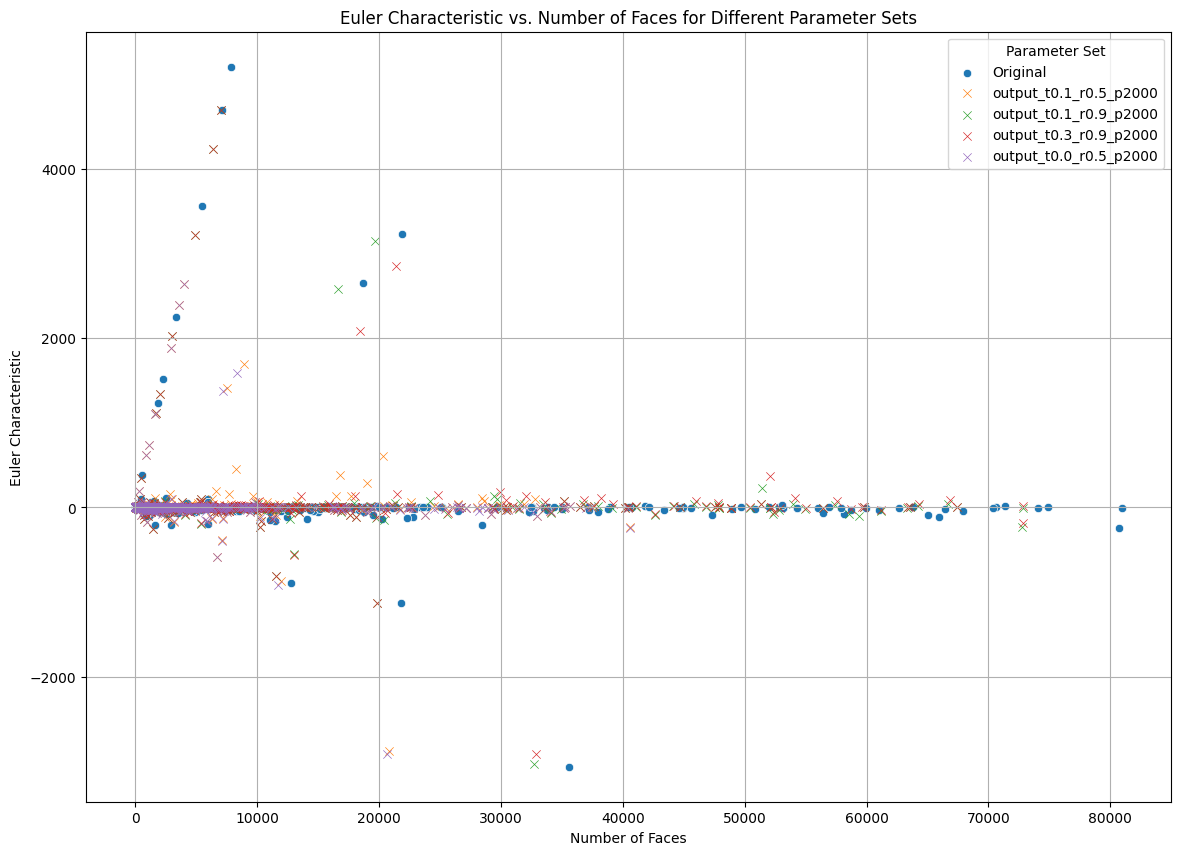

In [24]:
plt.figure(figsize=(14, 10))
sns.scatterplot(x=geom_data_original['num_faces'], y=geom_data_original['recalculated_euler_characteristic'], marker='o', label='Original')
for label, dataset in datasets.items():
    try:
        sns.scatterplot(x=dataset['num_faces'], y=dataset['euler_characteristic'], marker='x', label=label)
    except Exception as e:
        print(f"Could not process {label}: {str(e)}")

plt.title('Euler Characteristic vs. Number of Faces for Different Parameter Sets')
plt.xlabel('Number of Faces')
plt.ylabel('Euler Characteristic')
plt.legend(title='Parameter Set')
plt.grid(True)
plt.show()

Almost the same plot, but I guess some mistakes were made while generating the geometric data (or alternate approches to calculating it) which do not coinside with how `trimesh` handles the computation or the Euler characteristic.

In [25]:
outliers = {}
for label, dataset in datasets.items():
    dataset['euler_diff'] = abs(geom_data_original['recalculated_euler_characteristic'] - dataset['euler_characteristic'])
    outliers[label] = dataset[dataset['euler_diff'] > threshold]['file_id'].tolist()
outliers

{'output_t0.1_r0.5_p2000': [1051177,
  138092,
  138095,
  138189,
  138193,
  138199,
  138208,
  1508788,
  1508790,
  196125],
 'output_t0.1_r0.9_p2000': [138193, 148452],
 'output_t0.3_r0.9_p2000': [138193, 148452, 1508788],
 'output_t0.0_r0.5_p2000': [138092,
  138095,
  138189,
  138193,
  138199,
  138208,
  1508788,
  1508790]}

For the sake of time, I will only visualize the comparison original vs `'output_t0.0_r0.5_p2000'` meaning `threshold=0.0` and `ratio=0.5`. Maybe in future I will have time to do more.

output_t0.0_r0.5_p2000


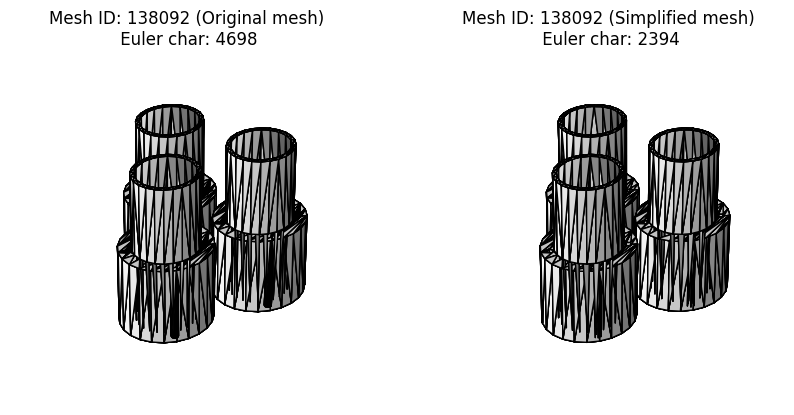

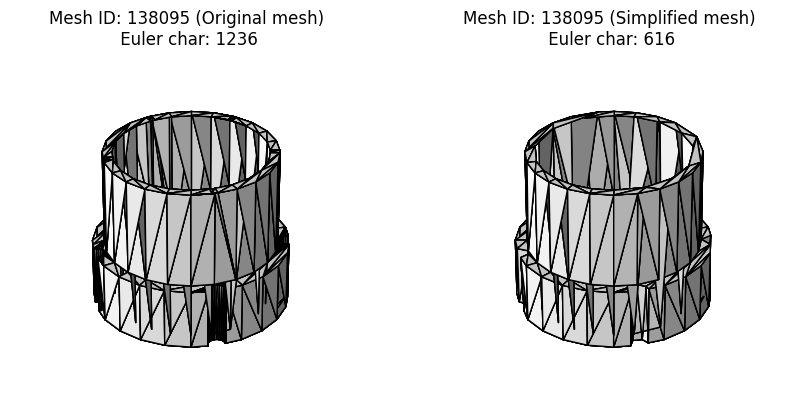

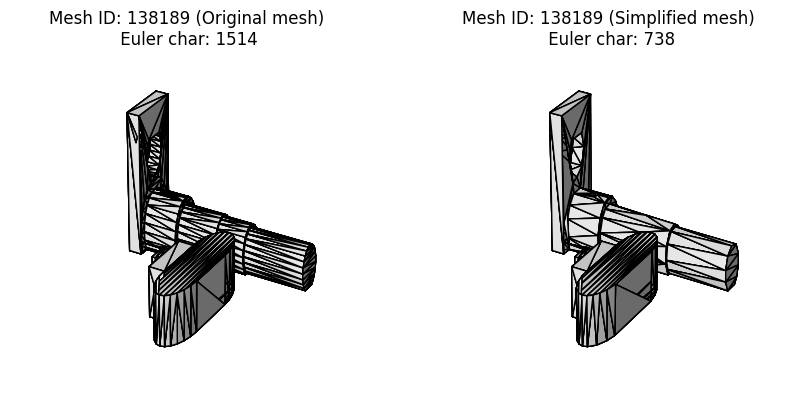

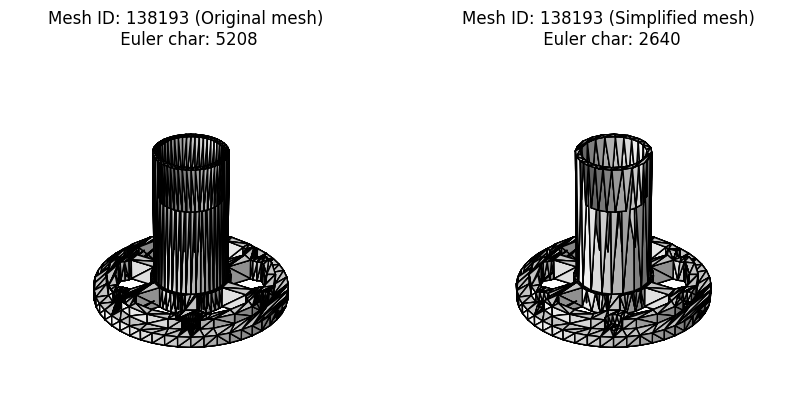

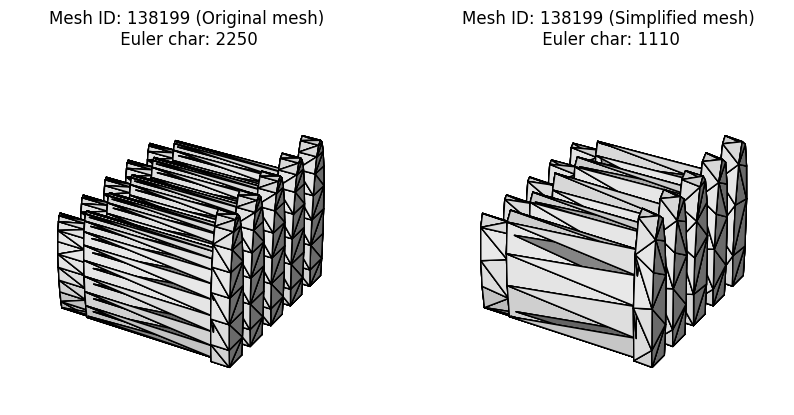

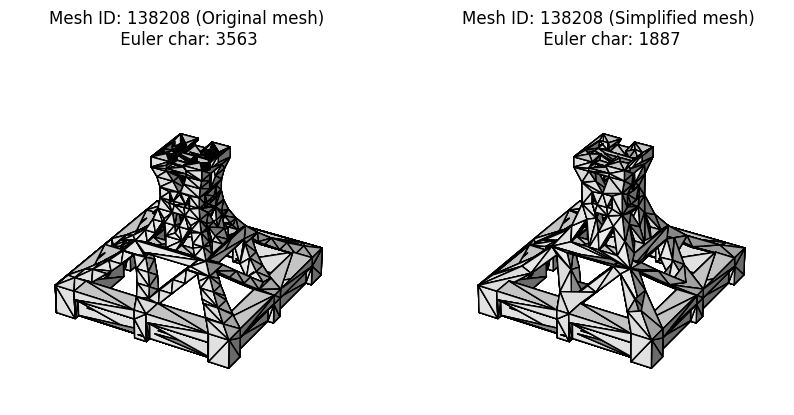

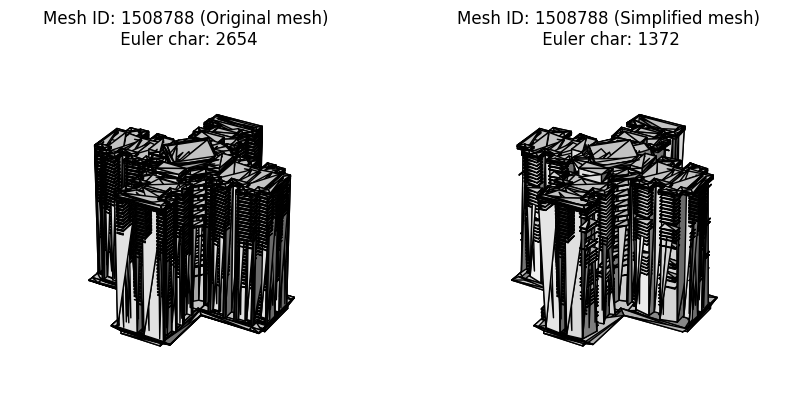

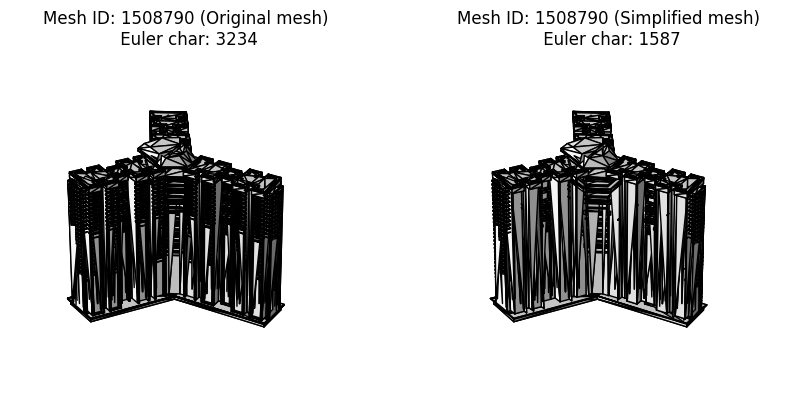

In [26]:
print('output_t0.0_r0.5_p2000')
display_mesh_previews(outliers['output_t0.0_r0.5_p2000'], original_folder_path, simplified_folder_path + 'output_t0.0_r0.5_p2000')

In some meshes we see a reduction of disconnected components, whereas in some there is an increase. The interesting thing is that it closes the holes, but breaks connectivity.

### Visual fidelity stats of outliers w.r.t. the Euler number

Let's see the visual fidelity stats for these meshes.

In [ ]:
visual_fidelity_folder = './../../data/csv_data/visual_fidelity_data/'

In [28]:
visual_fidelity_datasets={}
for run in run_folder_names:
    visual_fidelity_datasets[run] = pd.read_csv(visual_fidelity_folder + run + '_vf.csv')

In [29]:
visual_fidelity_datasets['output_t0.0_r0.5_p2000'].dtypes

file_id                     int64
hausdorff_distance        float64
rmse                      float64
garland_heckbert_error    float64
dtype: object

In [30]:
visual_fidelity_t0p1_r0p5 = visual_fidelity_datasets['output_t0.0_r0.5_p2000']

In [31]:
visual_fidelity_t0p1_r0p5[visual_fidelity_t0p1_r0p5.file_id.isin(outliers['output_t0.1_r0.5_p2000'])]

,file_id,hausdorff_distance,rmse,garland_heckbert_error
88,1051177,1.476361,0.445975,0.197644
478,138092,1.259554,0.422769,0.180692
479,138095,1.008571,0.309599,0.096701
480,138189,1.561584,0.497508,0.251744
481,138193,1.540669,0.498993,0.244707
483,138199,0.911869,0.285187,0.081289
484,138208,3.397623,1.113900,1.285995
551,1508788,2.316281,0.637868,0.417123
552,1508790,2.842765,0.812836,0.696345
685,196125,3.110062,1.108561,1.213751


Even though the topology has changed a lot of the simplified mesh, the error metrics have graded the simplification as not a bad one. There are meshes that have their simplified versions with a worse grade. It seem that these metrics are not good at catching such topological details.

A question I asked myself is are the errors correlated (they must be?)?

In [32]:
visual_fidelity_t0p1_r0p5.columns

Index(['file_id', 'hausdorff_distance', 'rmse', 'garland_heckbert_error'], dtype='object')

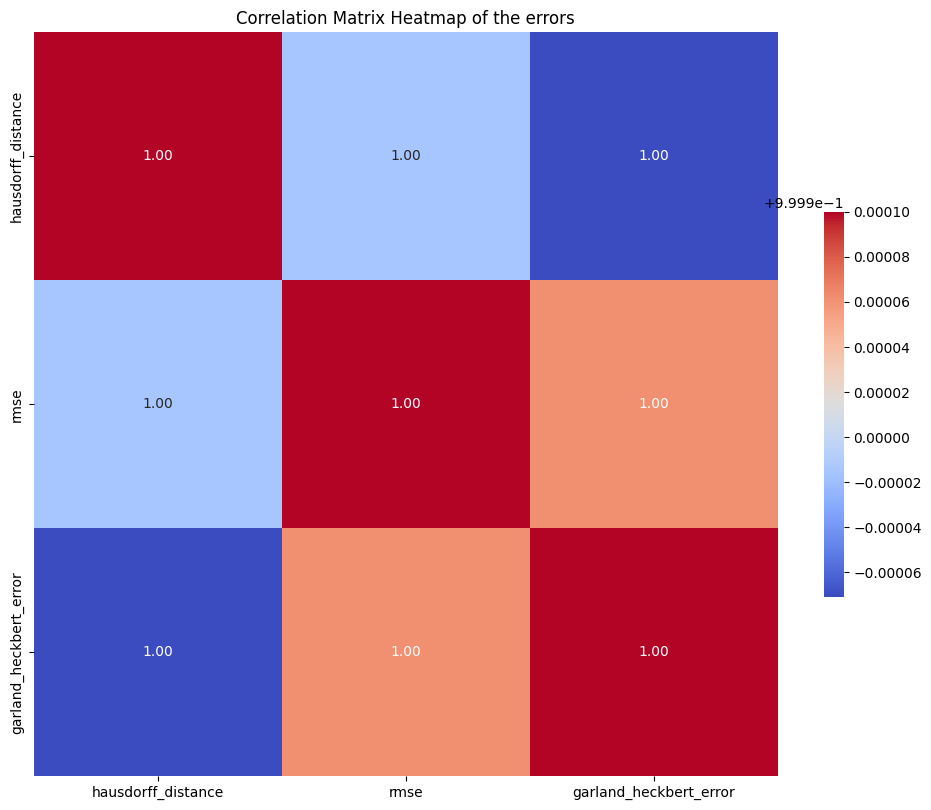

In [33]:
corr_matrix = visual_fidelity_t0p1_r0p5[['hausdorff_distance', 'rmse', 'garland_heckbert_error']].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix Heatmap of the errors')
plt.show()

Okay, so maybe I could have just implemented one error an dgo with it. That means that I can use say, the Hausdorff distance to see of the extramas of this dataset.

Let's see some of the extremas in the visual fidelity dataset with the hyperparameters `threshold=0.3` and `simplification_ration=0.9`.

In [34]:
for label, dataset in visual_fidelity_datasets.items():
    print(label)
    print(dataset.describe())

output_t0.1_r0.5_p2000
            file_id  hausdorff_distance         rmse  garland_heckbert_error
count  7.000000e+02          700.000000   700.000000            7.000000e+02
mean   6.124237e+05           10.935152     3.189167            4.743482e+03
std    6.073441e+05          222.279253    68.379284            1.254609e+05
min    1.000260e+05            0.033480     0.010935            1.217807e-04
25%    1.176165e+05            0.902572     0.274412            7.596936e-02
50%    1.532350e+05            1.574958     0.478948            2.376031e-01
75%    1.224386e+06            2.782010     0.788676            6.629110e-01
max    1.772543e+06         5882.469281  1809.677797            3.319384e+06
output_t0.1_r0.9_p2000
            file_id  hausdorff_distance         rmse  garland_heckbert_error
count  7.000000e+02          700.000000   700.000000            7.000000e+02
mean   6.124237e+05            9.651708     3.141250            4.756811e+03
std    6.073441e+05          2

In [35]:
visual_fidelity_t0p3_r0p9 = visual_fidelity_datasets['output_t0.3_r0.9_p2000']

In [36]:
visual_fidelity_t0p3_r0p9.loc[visual_fidelity_t0p3_r0p9.hausdorff_distance.argmax(axis=0)]

file_id                   1.619332e+06
hausdorff_distance        5.913427e+03
rmse                      1.827945e+03
garland_heckbert_error    3.365953e+06
Name: 612, dtype: float64

In [37]:
visual_fidelity_t0p3_r0p9.loc[visual_fidelity_t0p3_r0p9.hausdorff_distance.argmin(axis=0)]

file_id                   101250.000000
hausdorff_distance             0.028085
rmse                           0.009167
garland_heckbert_error         0.000083
Name: 32, dtype: float64

Let's see the extremas of the worst performer in all runs which is locate din the dataset with threshold=0.3 and ratio=0.9:

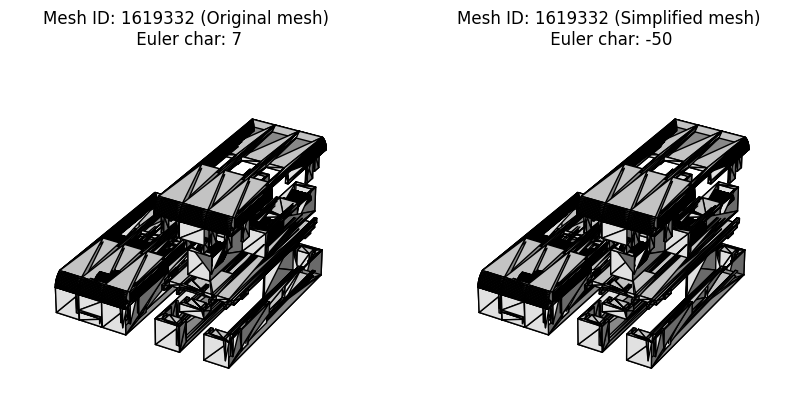

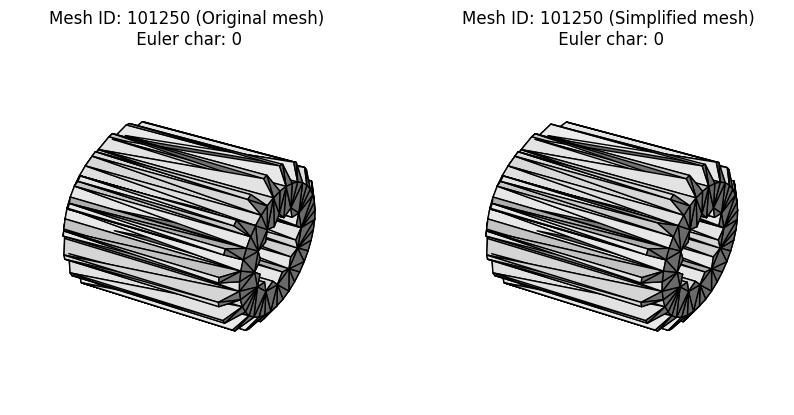

In [38]:
display_mesh_previews([1619332, 101250], original_folder_path, simplified_folder_path + 'output_t0.3_r0.9_p2000')

I can see why it rated the first mesh to be an bad simplification as a lot of detail is lost and I think that the same mesh is rated as bad in all the runs. The seond one is rated the best one as everything is preserved, even some holes are closed.

### Conclusion and TODOs

I am sorry that I don't have time to analyze more. The data generation, cleaning, etc. was a lot of work.

What I can say by looking at the plots and visualizations from this notebook is that there is not a perfect combination of hyperparameters which will work for all meshes. Higher thresholds and ratios led to more aggressive simplification, often resulting in significant changes to the mesh topology, as indicated by the Euler characteristic. Lower thresholds and ratios were more conservative, preserving more of the original mesh's topological features.

My hypothesis is that depending on the mesh complexity, topology and other characteristics I couldn't investigate in this analysis, there may be a way to divide them in groups by some their properties and find a suitable combination of hyperparameters which may produce plausible simplifications. This will be an interesting task to try to find a model which given geometric parameters of the mesh can produce plausible values for the hyperparameters of the simplification algorithm. 